In [1]:
import pandas as pd
import pandas_ta as ta

data = pd.read_csv("data.csv")
data['date'] = pd.to_datetime(data['date'])  
data.set_index('date', inplace=True)

super_trend = ta.supertrend(data.high,data.low,data.close,length = 14,multiplier=4)
data = pd.merge(data, super_trend['SUPERT_14_4.0'],left_index=True,right_index=True)
data = data.dropna()

# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')
data = data.drop(data.index[0])

data

,open,high,low,close,volume,SUPERT_14_4.0
date,,,,,,
2024-01-19 05:30:00,633.00,635.50,624.70,627.75,11675202,580.780037
2024-01-20 05:30:00,629.00,633.80,624.10,631.40,9886760,580.780037
2024-01-23 05:30:00,627.00,634.90,600.65,605.10,30954343,580.780037
2024-01-24 05:30:00,609.95,622.35,603.10,618.30,19221835,580.780037
2024-01-25 05:30:00,618.50,623.80,606.25,612.75,22684904,580.780037
...,...,...,...,...,...,...
2024-10-31 05:30:00,820.00,828.00,813.55,820.20,13402324,838.174898
2024-11-01 05:30:00,822.40,825.60,818.90,821.20,1637141,838.174898
2024-11-04 05:30:00,822.70,837.50,807.10,829.85,14498161,838.174898


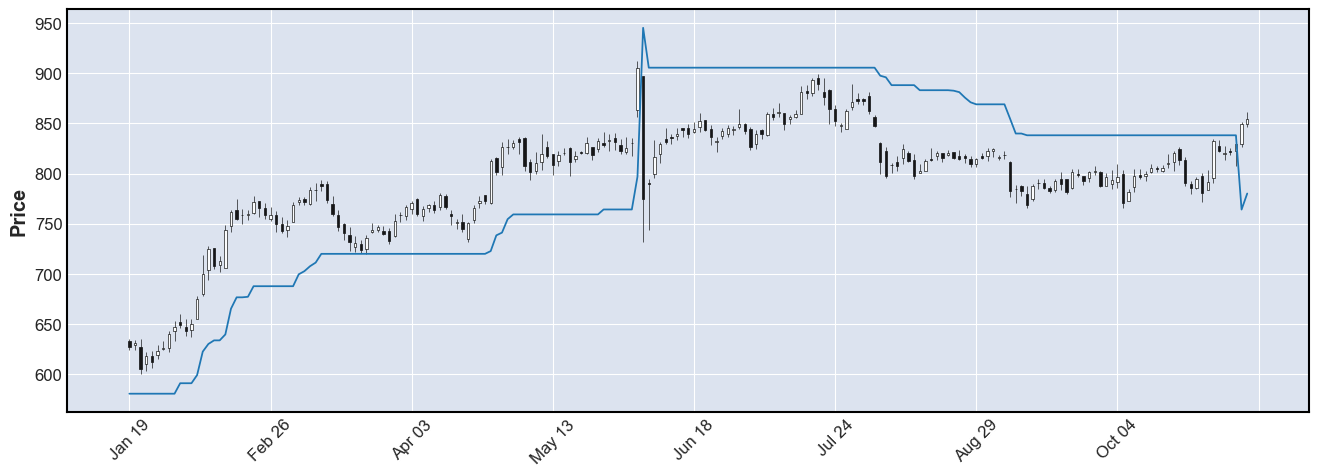

In [2]:
import mplfinance as mpf

adp= [mpf.make_addplot(data['SUPERT_14_4.0'],type ='line')]

mpf.plot(data,type='candle',figratio=(15,5),addplot=adp)

In [3]:
data = data.copy()

data['Signal'] = 0  # Initializing the 'Signal' column with 0

# Adding Long signals where price crosses above supertrend and comparing with the previous bar
data.loc[(data['close'] > data['SUPERT_14_4.0']) ,'Signal'] = 1

# Adding Short signals where price crosses below supertrend and comparing with the previous bar
data.loc[(data['close'] < data['SUPERT_14_4.0']), 'Signal'] = -1
data['close_Shifted'] = data['close'].shift(-1)
data = data.dropna(subset=['close_Shifted'])
data

,open,high,low,close,volume,SUPERT_14_4.0,Signal,close_Shifted
date,,,,,,,,
2024-01-19 05:30:00,633.00,635.50,624.70,627.75,11675202,580.780037,1,631.40
2024-01-20 05:30:00,629.00,633.80,624.10,631.40,9886760,580.780037,1,605.10
2024-01-23 05:30:00,627.00,634.90,600.65,605.10,30954343,580.780037,1,618.30
2024-01-24 05:30:00,609.95,622.35,603.10,618.30,19221835,580.780037,1,612.75
2024-01-25 05:30:00,618.50,623.80,606.25,612.75,22684904,580.780037,1,622.95
...,...,...,...,...,...,...,...,...
2024-10-30 05:30:00,828.00,833.00,821.05,822.45,15977682,838.174898,-1,820.20
2024-10-31 05:30:00,820.00,828.00,813.55,820.20,13402324,838.174898,-1,821.20
2024-11-01 05:30:00,822.40,825.60,818.90,821.20,1637141,838.174898,-1,829.85


In [4]:
# Initializing a new column 'MTM' for Mark-to-Market
data['MTM'] = 0.0

# Running a for loop to calculate MTM
for i in range(1, len(data)):
    close_shifted = data.iloc[i]['close_Shifted']
    close = data.iloc[i]['close']

    # Calculate MTM based on Signal value
    if data.iloc[i]['Signal'] == 1:
        # Long position
        data.at[data.index[i], 'MTM'] = (close_shifted - close) if not pd.isna(close_shifted) else 0
    elif data.iloc[i]['Signal'] == -1:
        # Short position
        data.at[data.index[i], 'MTM'] = (close - close_shifted) if not pd.isna(close_shifted) else 0

# Calculating cumulative PNL
data['Cumulative_PNL'] = data['MTM'].cumsum()
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')
data

,open,high,low,close,volume,SUPERT_14_4.0,Signal,close_Shifted,MTM,Cumulative_PNL
date,,,,,,,,,,
2024-01-19 05:30:00,633.00,635.50,624.70,627.75,11675202,580.780037,1,631.40,0.00,0.00
2024-01-20 05:30:00,629.00,633.80,624.10,631.40,9886760,580.780037,1,605.10,-26.30,-26.30
2024-01-23 05:30:00,627.00,634.90,600.65,605.10,30954343,580.780037,1,618.30,13.20,-13.10
2024-01-24 05:30:00,609.95,622.35,603.10,618.30,19221835,580.780037,1,612.75,-5.55,-18.65
2024-01-25 05:30:00,618.50,623.80,606.25,612.75,22684904,580.780037,1,622.95,10.20,-8.45
...,...,...,...,...,...,...,...,...,...,...
2024-10-30 05:30:00,828.00,833.00,821.05,822.45,15977682,838.174898,-1,820.20,2.25,98.80
2024-10-31 05:30:00,820.00,828.00,813.55,820.20,13402324,838.174898,-1,821.20,-1.00,97.80
2024-11-01 05:30:00,822.40,825.60,818.90,821.20,1637141,838.174898,-1,829.85,-8.65,89.15


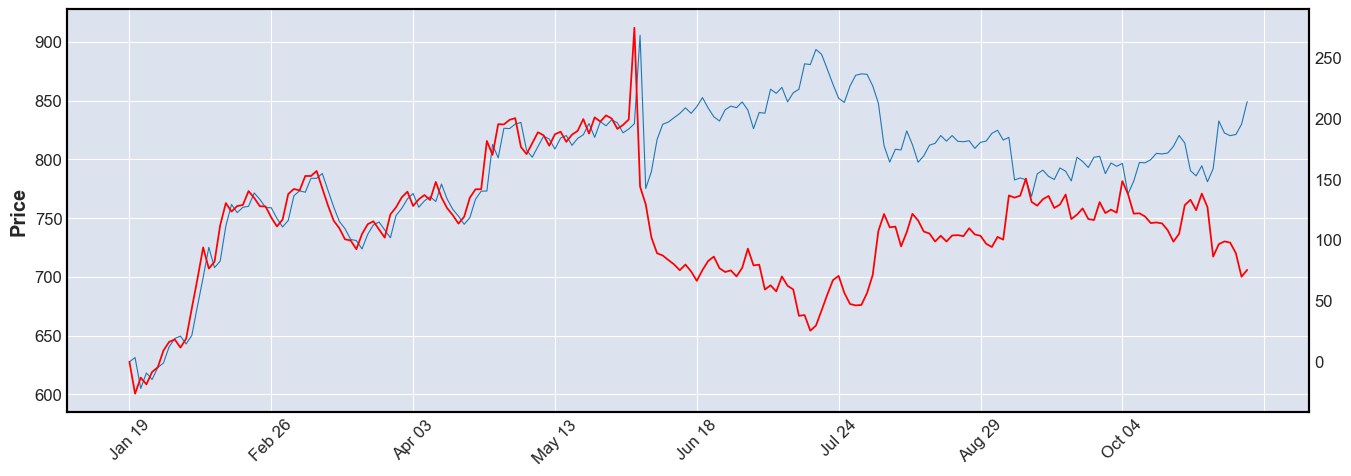

In [5]:
data.index = pd.to_datetime(data.index)
cpd= [mpf.make_addplot(data['Cumulative_PNL'],type ='line',color='red')]
mpf.plot(data,type='line',figratio=(15,5),addplot=cpd)